### Part A: Model Code

1. Write a function to calculate and return the Euclidean distance of two vectors where a vector represents a data point.[4 pts] &
2. Also write a function to calculate and return the Manhattan distance of two vectors [4 pts]

I did this in one function, minkowski_dist

In [1]:
import numpy as np

def minkowski_dist(x, z, p=1, **kwargs):
    """
    calculate the Lp distance between vectors x and z.
 
    Parameters
    ------------
        x: numpy.ndarray
            vector x
        z: numpy.ndarray
            vector z
        p: int, Optional
            parameter p for the Minkowski distance formula. When p=1 it is the Manhattan distance, 
            when p=2 it is the Euclidean distance. If not specified, Manhattan distance is used.
    Return
    -----------
        distance : float
            The calculated distance between x and z
    """
    # validations
    assert type(p) == int, "P must be an integer"
    assert isinstance(x, np.ndarray), "x must be an np.array (vector)"
    assert isinstance(z, np.ndarray), "z must be an np.array (vector)"
    assert len(x) == len(z), "x and z must have the same dimensions"
    
    distance = sum(abs(x_i - z_i)**p for x_i, z_i in zip(x, z))**(1/p)
    return distance

3. Write a function to calculate and return the accuracy and generalization error of two vectors.
[4 pts]

In [2]:
def accuracy_and_gen_error(pred_labels, gold_labels):
    """
    calculate the accuracy and generalization error between two vectors, pred_labels (predictions) and gold_labels
    (gold). Returns a tuple of accuracy and gen_error.
 
    Parameters
    ------------
        x: numpy.ndarray
            vector x, the prediction vector
        z: numpy.ndarray
            vector z, the gold labels vector
    Return
    -----------
        accuracy : float
            The ratio of correctly classified labels
        gen_error: float
            The ratio of incorrectly classified labels
    """
    assert isinstance(pred_labels, np.ndarray), "pred_labels must be an np.array (vector)"
    assert isinstance(gold_labels, np.ndarray), "gold_labels must be an np.array (vector)"
    assert len(pred_labels) == len(gold_labels), "The two vectors must be equal in size"
    
    # this works because python stores the bool True as one. 
    # since pred_labels and gold_labels are the same len, only need to divide by one len
    accuracy = sum([x_i==z_i for x_i,z_i in zip(pred_labels,gold_labels)])/len(pred_labels)
    gen_error = 1 - accuracy
    return accuracy, gen_error

Note: This is being done before 4.

5. Write a function to compute the confusion matrix of two vectors. [4 pts]

In [3]:
def compute_confusion(pred_labels, gold_labels):
    """
    given prediction vector pred_labels and gold label vector gold_labels, returns an array containing the 
    confusion matrix. This function only works for the case of binary classification.
 
    Parameters
    ------------
        pred_labels: numpy.ndarray
            vector x, the prediction vector
        gold_labels: numpy.ndarray
            vector z, the gold labels vector
    Return
    -----------
        confusion: numpy.ndarray
            the confusion matrix between x and z
    """
    assert isinstance(pred_labels, np.ndarray), "pred_labels must be an np.array (vector)"
    assert isinstance(gold_labels, np.ndarray), "gold_labels must be an np.array (vector)"
    
    confusion = np.array([[0, 0], [0, 0]])
    for x_i, z_i in zip(pred_labels, gold_labels):
        # z_i = row, x_i = col. This takes advantage of the fact that this is binary classification and it is a 2x2 matrix
        confusion[z_i][x_i] += 1
    return confusion

4. Write three functions to compute: precision, recall and F1 score. [6 pts]

I did this in one function, compute_metric

In [4]:
def compute_metric(pred_labels, gold_labels, metric='all'):
    """
    compute one of the following metrics: ['precision', 'recall', 'f1', 'false_positive_rate', 'all'] between pred_labels and gold_labels.
    By default, all are calculated.
 
    Parameters
    ------------
        pred_labels: numpy.ndarray
            vector x, the prediction vector
        gold_labels: numpy.ndarray
            vector z, the gold labels vector
        metric: str, Optional
            the metric being calculated, can be one in ['precision', 'recall', 'f1', 'false_positive_rate', 'all']. 
            If not specified, all are calculated.
    Return
    -----------
        metric: float (or dict)
            the value from the metric calculation
    """
    # other asserts happen through compute_confusion() call
    assert metric in ['precision', 'recall', 'f1', 'false_positive_rate', 'all'], "Please select a metric in ['precision', 'recall', 'f1']"
    
    confusion = compute_confusion(pred_labels, gold_labels)
    
    if metric == 'precision':
        return (confusion[1][1])/(confusion[1][1] + confusion[0][1])
    if metric == 'recall':
        return (confusion[1][1])/(confusion[1][1] + confusion[1][0])
    if metric == 'false_positive_rate':
        return (confusion[0][1])/(confusion[0][1] + confusion[0][0])
    else:
        precision = (confusion[1][1])/(confusion[1][1] + confusion[0][1])
        recall = (confusion[1][1])/(confusion[1][1] + confusion[1][0])
        f1 = 2 * ((precision * recall)/(precision + recall))
        if metric == 'f1':
            return f1
        # if all are needed...
        all_dict = {
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'false_positive_rate': (confusion[0][1])/(confusion[0][1] + confusion[0][0])
        }
    return all_dict

6. Write a function to generate the Receiver Operating Characteristic (ROC) curve. [8 pts]

In [5]:
import matplotlib.pyplot as plt

In [6]:
def generate_roc_curve(gold_labels, scores, show_graph=True):
    """
    generates the roc_curve using prediction scores and gold_labels. Optionally shows a graph. 
 
    Parameters
    ------------
        gold_labels: numpy.ndarray
            the gold label vector
        scores: numpy.ndarray
            the classifier scores
        show_graph: bool, Optional
            plots the ROC curve using matplotlib
    Return
    -----------
        fprs: np.ndarray
            the false positive rate for different threshold values
        tprs: np.ndarray
            the true positive rate (recall) for different threshold values
        thresholds: np.ndarray
            the thresholds values
    """
    assert isinstance(show_graph, bool), "show_graph is either True or False"
    
    thresholds = sorted(scores) # the thresholds really only need to be the scores that we know exist
    fprs, tprs = np.zeros(len(thresholds)), np.zeros(len(thresholds))
    for i, t in enumerate(thresholds):
        preds = np.array([1 if score >= t else 0 for score in scores]) # making an array of predictions with threshold t
        # appending fpr and tpr (recall)
        fprs[i] = compute_metric(preds, gold_labels, metric = 'false_positive_rate')
        tprs[i] = compute_metric(preds, gold_labels, metric = 'recall')
    
    if show_graph:
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.plot(fprs, tprs)
        plt.grid()
        plt.show()
    
    return np.array(fprs), np.array(tprs), thresholds

7. Write a function to compute area under curve (AUC) for the ROC curve. [5 pts]

In [7]:
def compute_auc_roc(gold_labels, scores):
    """
    computes the area under the ROC curve using a search step which represents delta x
 
    Parameters
    ------------
        gold_labels: numpy.ndarray
            the gold label vector
        scores: numpy.ndarray
            the classifier scores
    Return
    -----------
        auc_roc: float
            the calculated AUC ROC.
    """
    fprs, tprs, _ = generate_roc_curve(gold_labels, scores, show_graph=False)
    areas = []
    for fpr1, fpr2, tpr in zip(fpr[:-1], fpr[1:], tprs):
        # for every first false pos rate, and second false pos rate, and every true pos rate
        area_of_rectangle = (fpr1-fpr2)*tpr
        areas.append(area_of_rectangle)
    return(sum(areas))

8. Write a function to generate the precision-recall curve. [10 pts]

In [8]:
def generate_precision_recall(gold_labels, scores, show_graph=True):
    """
    generates the precision-recall graph using prediction scores and gold_labels. Optionally shows a graph. 
 
    Parameters
    ------------
        gold_labels: numpy.ndarray
            the gold label vector
        scores: numpy.ndarray
            the classifier scores
        show_graph: bool, Optional
            plots the precision-recall curve using matplotlib
    Return
    -----------
        precisions: np.ndarray
            the precision for different threshold values
        recalls: np.ndarray
            the recall for different threshold values
        thresholds: np.ndarray
            the thresholds values
    """
    assert isinstance(show_graph, bool), "show graph is either True or False"
    
    thresholds = sorted(scores)
    recalls, precisions = np.zeros(len(thresholds)), np.zeros(len(thresholds))
    for i, threshold in enumerate(thresholds):
        preds = np.array([1 if score >= threshold else 0 for score in scores]) # making an array of predictions with threshold t
        recalls[i] = compute_metric(preds, gold_labels, metric = 'recall')
        precisions[i] = compute_metric(preds, gold_labels, metric = 'precision')
    
    if show_graph:
        # plotting against threshold
        # CODE CITATION - Geron Chapter 3, it is slightly changed
        plt.title ('Precision and Recall vs. Threshold')
        plt.plot(thresholds, recalls, "b-", label="Recall") 
        plt.plot(thresholds, precisions, "r-", label="Precision") 
        plt.xlabel("Thresholds")
        plt.grid()
        plt.show()
        plt.close()

        # plotting precision vs recall
        plt.title('Precision vs. Recall')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.plot(recalls, precisions)
        plt.grid()
        plt.show()

    return precisions, recalls, thresholds

9. Implement a KNN_Classifier model class. It should have the following three methods. [20
pts]

In [120]:
class KNN_Classifier():

    def __init__(self):
        pass

    def fit(self, X, Y, n_neighbors=3, weights='uniform', **kwargs):
        """
        fit the model to data

        Parameters
        ------------
        X : ndarray
            A numpy array with rows representing data samples and columns representing features.
        Y : ndarray
            A 1D numpy array with labels corresponding to each row of the feature matrix X. n_neighbors : int The number of nearest neighbors.
        weights : string, optional
            (default = ‘uniform’) The weight function used in prediction. Possible values:
            - ‘uniform’: uniform weights. All points in each neighborhood are weighted equally.
            - ‘distance’: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away [10 pts]

        Return
        -----------
        None

        """
        self.X = X
        self.Y = Y
        self.k = n_neighbors
        self.weights = weights
        self.kwargs = kwargs
        print("""KNN fit
        train_data shape {}
        label_data shape {}
        k: {}
        weights: {}
        kwargs <{}>""".format(self.X.shape, self.Y.shape, self.k, self.weights, self.kwargs))

    def predict(self, X):
        """
        Make predictions using stored values

        Parameters
        ------------
        X : ndarray
            A numpy array containing samples to be used for prediction. 
            Its rows represent data samples and columns represent features.
        Return
        -----------
        preds : ndarray
            1D column vector of predictions for each row in X.
        """
        # creating container for labels
        preds = np.zeros((len(X)),dtype=int)
        # iterating through every new data point
        for i, x in enumerate(X):
            
            # computing distance between every datapoint to new datapoint
            points = [(y_i, minkowski_dist(x, z_i, **self.kwargs)) for y_i, z_i in zip(self.Y, self.X)]
            
            # getting the k closest distances
            closest = sorted(points, key=lambda i: i[1])[:self.k]
            
            # decision function
            if self.weights == 'uniform':
                labels, dists = zip(*closest)
                decision = 1 if sum(labels)/self.k >= 0.5 else 0
                
            else: # inverse of distance
                label_scores = np.zeros(2) # this will store the values for each label
                for label, dist in closest:
                    # adding the inverse weight of each point to the scores
                    label_scores[label] += 1/dist
                # the decision is the index with higher score
                decision = 0 if label_scores[0]>label_scores[1] else 1
                
            # storing decision
            preds[i] = decision
        return preds.transpose()

### Part B: Data Processing

In [115]:
pwd

'/Users/danielyakubov/ml/homeworks/KNN'

10. Read in the winequality-white.csv file as a Pandas data frame.

In [116]:
import pandas as pd

data = pd.read_csv('winequality-white.csv', sep=';')

In [117]:
# checking the size
data.shape

(4898, 12)

In [13]:
# taking a peek at the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


11. The target will be the “quality” column which represents rating of wine and ranges from 3 to 8. You will need to convert it into a two-category variable consisting of “good” (quality > 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine).

In [14]:
# FIRST: check for missing values
set(data['quality'])

{3, 4, 5, 6, 7, 8, 9}

In [15]:
# looks like everything is there
data['quality'] = data['quality'].apply(lambda x: 1 if x > 5 else 0)

In [16]:
# confirming that worked
set(data['quality'])

{0, 1}

12. Use the techniques from the first recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. Include this in your report.

In [17]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


13. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names. [2 pts]

In [18]:
# adding a random_state for reproducibility
shuffled_data = data.sample(frac=1, random_state=42)

In [19]:
shuffled_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4656,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,1
3659,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,1
907,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,1
4352,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,0
3271,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,1


In [20]:
shuffled_data.shape

(4898, 12)

14. Generate pair plots using the seaborn package. This will be used to identify and report the redundant features, if there is any. [2 pts]

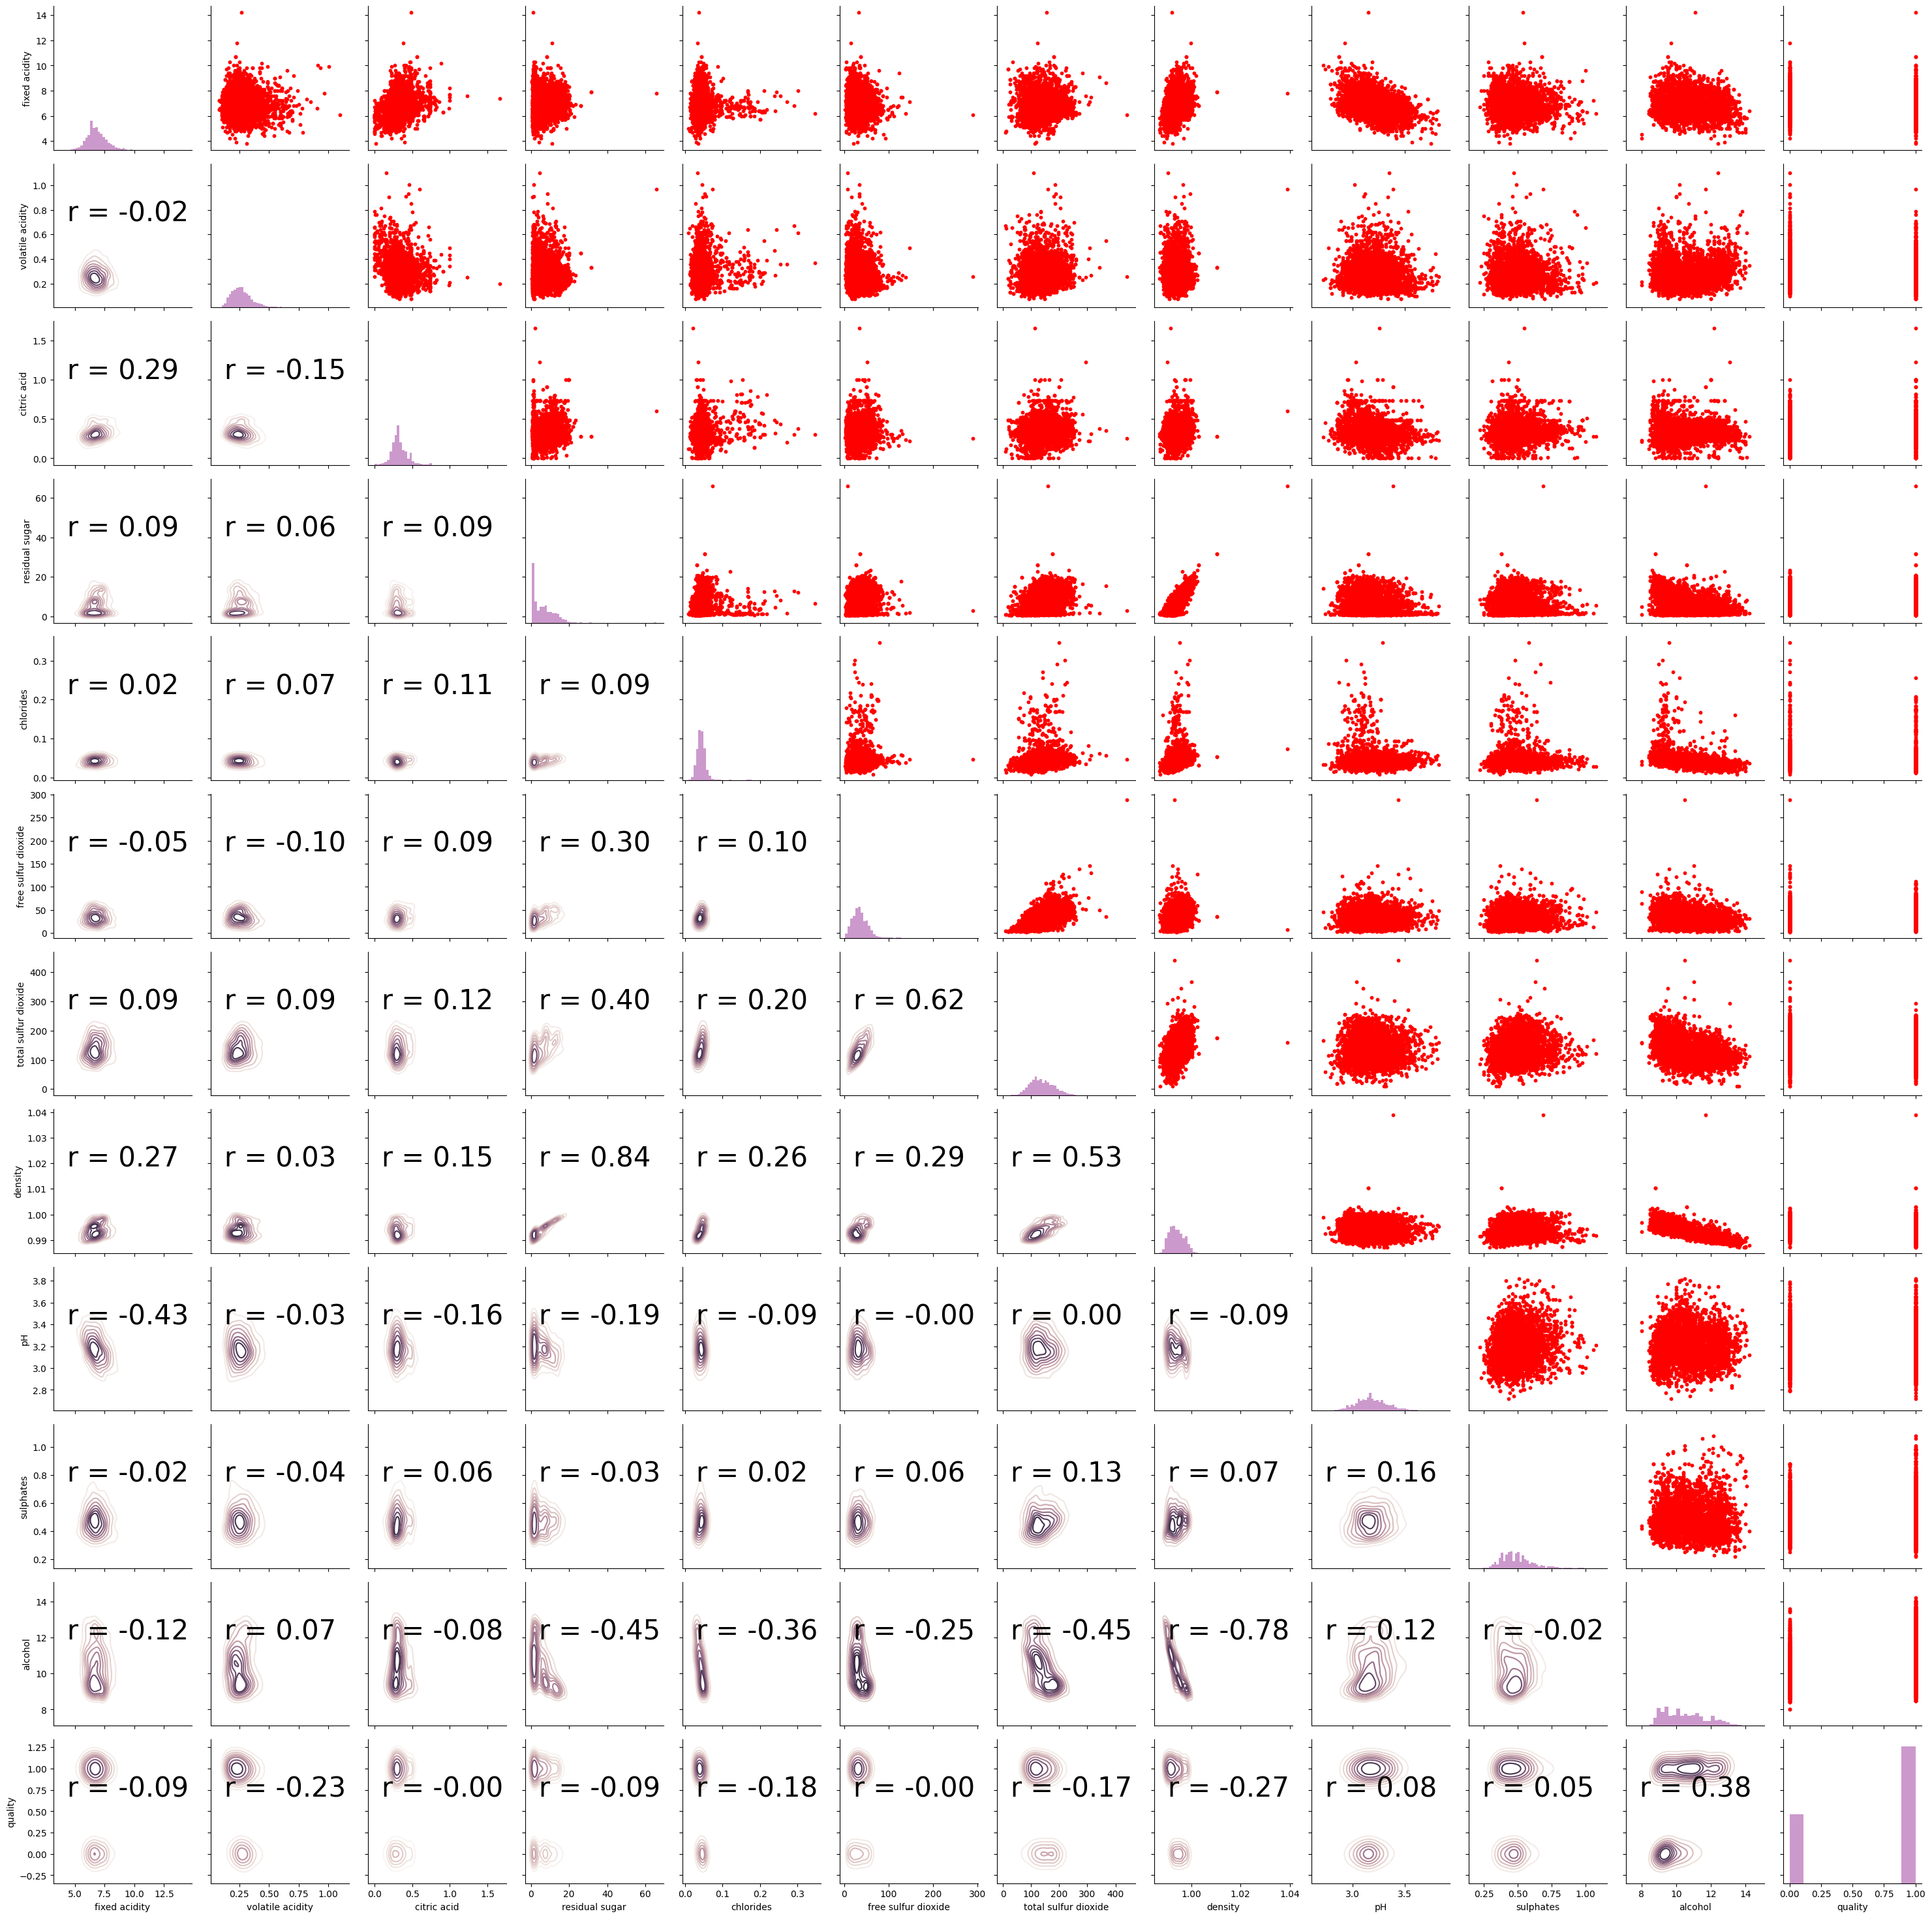

In [21]:
# Citation: class code, MLS23-Workbook1-Stage1-EDA-release
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
# needed for pearsonr calculation
from scipy import stats

# Calculate correlation, coefficient
def corrfunc(x, y, **kwargs):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy=(.1, .6), xycoords=ax.transAxes,
               size = 30)

cmap = sns.cubehelix_palette(light=1, dark=0.1, hue=0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(data)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color='red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color='purple')

# Density Plot and Correlation Coefficients on the lower triangle
g.map_lower(sns.kdeplot,cmap=cmap, color= 'blue')
g.map_lower(corrfunc)

15. Drop redundant features and provide an explanation for doing so. [3 pts]

In [22]:
# Dropping density, it is highly correleated with two features: 
# residual sugar (r=0.84) and alcohol (r=-0.78)
data = data.drop(['density'], axis=1)

Write a function named “partition” to split your data into training and test set. The function should take 3 arguments: [ 5 pts]
- feature matrix (numpy array with rows representing data samples and columns representing features.),
- target vector (numpy array with labels corresponding to each row of the feature matrix),
- t where t is a real number to determine the size of partition. For example, if t is set to 0.2, then 80% of the data will be used for training and 20% for testing.
- This function should return two feature matrices for training and test data, and two target vectors for training and test data.


In [23]:
def partition(features, targets, t=0.2):
    """
    splits data into a training and test set
    
    Parameters
    ------------
        features: numpy.ndarray
            feature matrix
        targets: numpy.ndarray
            label column vector
        t: float
        size of partition
    Return
    -----------
        X_train: numpy.ndarray
            Features for training set
        X_test: numpy.ndarray
            Features for test set
        y_train: numpy.ndarray
            labels for training set
        y_test: numpy.ndarray
            labels for test set
    """
    assert len(features)==len(targets), "The vectors must be the same length"
    assert isinstance(t, float) or isinstance(t, int), "t must be a real number"
    
    cutoff = round(len(features) * t) # the index where the data will be cut off
    return (
        np.array(features[cutoff:]),
        np.array(features[:cutoff]),
        np.array(targets[cutoff:]),
        np.array(targets[:cutoff])
    )

In [24]:
# sectioning out target from features
y = data['quality']
X = data.drop('quality', axis=1)

In [25]:
# splitting the data
X_train, X_test, y_train, y_test = partition(X, y, t=0.2)

17.
Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and using Euclidean distance. [15 pts]

In [26]:
# Creating a new instance of KNN
naive_knn = KNN_Classifier()
# fitting to data
naive_knn.fit(X_train, y_train, 5, weights='uniform', p=2)

KNN fit
        k: 5
        weights: uniform
        kwargs <{'p': 2}>


In [27]:
# prediction
preds = naive_knn.predict(X_test)

a. Use accuracy and F1 score to compare your predictions to the expected labels.

In [28]:
# reporting some metrics
naive_accuracy, naive_gen_error = accuracy_and_gen_error(preds, y_test)
naive_f1 = compute_metric(preds, y_test, metric='f1')
print("Naive Accuracy:", naive_accuracy)
print("Naive f1:", naive_f1)

Naive Accuracy: 0.6173469387755102
Naive f1: 0.7081712062256811


b. Now standardize each feature of your training set (subtract mean and divide by standard deviation). Use the mean and standard deviation values for each feature in the training set to scale the test data.

In [29]:
standardized_X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
standardized_X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1 score with the expected labels.

In [48]:
# Creating a new instance of KNN
standardized_knn = KNN_Classifier()
# fitting to data
standardized_knn.fit(standardized_X_train, y_train, 5, weights='uniform', p=2)

# prediction
std_preds = standardized_knn.predict(standardized_X_test)

# reporting some metrics
standardized_accuracy, naive_gen_error = accuracy_and_gen_error(std_preds, y_test)
standardized_f1 = compute_metric(std_preds, y_test, metric='f1')
print("standardized Accuracy:", standardized_accuracy)
print("standardized f1:", standardized_f1)
print('--')
print("Naive Accuracy:", naive_accuracy)
print("Naive f1:", naive_f1)

KNN fit
        k: 5
        weights: uniform
        kwargs <{'p': 2}>
standardized Accuracy: 0.686734693877551
standardized f1: 0.7569279493269992
--
Naive Accuracy: 0.6173469387755102
Naive f1: 0.7081712062256811


d.Compare the two accuracy values and the F1 scores; and decide whether you should use standardized data or unscaled data for the remainder of the assignment. This will described in the report

In [31]:
#Based on the output from above, the model trained on scaled data performed better in both accuracy and f1.
#the the rest of the assignment, I will use the standardized data

e. Perform a similar test for inverse distance weighting in the KNN_Classifier model and determine whether or not to use it. This will go in the report. [5 pts]

In [49]:
# Creating a new instance of KNN
standardized_knn = KNN_Classifier()
# fitting to data (with inverse distance specified)
standardized_knn.fit(standardized_X_train, y_train, 5, weights='distance', p=2)

# prediction
inv_std_preds = standardized_knn.predict(standardized_X_test)

# reporting some metrics
inv_standardized_accuracy, naive_gen_error = accuracy_and_gen_error(inv_std_preds, y_test)
inv_standardized_f1 = compute_metric(inv_std_preds, y_test, metric='f1')
print("standardized Accuracy, uniform dist:", standardized_accuracy)
print("standardized f1, uniform dist:", standardized_f1)
print('---')
print("standardized Accuracy, inverse dist:", inv_standardized_accuracy)
print("standardized f1, inverse dist:", inv_standardized_f1)

KNN fit
        k: 5
        weights: distance
        kwargs <{'p': 2}>
standardized Accuracy, uniform dist: 0.686734693877551
standardized f1, uniform dist: 0.7569279493269992
---
standardized Accuracy, inverse dist: 0.6857142857142857
standardized f1, inverse dist: 0.7555555555555556


In [51]:
# uniform distance is better in this case, 
# it leads to slightly higher values for both the reported metrics

18) Evaluation of an estimator performance via cross-validation: Implement the S-fold cross-
validation function. [10 pts]

In [127]:
from typing import List, Tuple

def _calculate_fold(folds, data, labels) -> List[Tuple]:
    #  a helper function to calculate an s-partition of the data 
    s = int(len(data)/folds)
    fold = slice(0, s) # creating a slice object to help track folds
    folded_data = [] 
    for _ in range(folds):
        folded_data.append((data[fold], labels[fold]))
        fold = slice(fold.start+s, fold.stop+s) # updating the slice
    return folded_data
    

def sFold(folds, data, labels, model, error_function, model_args, func_args):
    """
    Preforms k fold validation on the model using the error_function
    
    Parameters
    ------------
        folds: int
            how many folds of the data will be made
        data: numpy.ndarray
            feature array
        labels: numpy.ndarray
            feature labels
        model: any object with fit/predict funcs
            the model that we are evaluating
        error_function: string
            how to calculate error values between predicted and true labels
        model_args: args
            the arguments that will be passed to the model
        func_args: args
            the arguments for the error_function
    Return
    -----------
        model_vals: dict
            a dictionary containing
                i. Expected labels - golds
                ii. Predicted labels - preds
                iii. Average error according to the error function

    """
    assert len(data) == len(labels), "data and labels must be of equal len"
    assert isinstance(folds, int), "folds must be an integer value"
    assert isinstance(data, np.ndarray), "data must be an np.ndarray"
    assert isinstance(labels, np.ndarray), "labels must be an np.ndarray"
    assert hasattr(model, "fit") and hasattr(model, "predict"), "model must have fit and predict attributes"
    
    sfolds = _calculate_fold(folds, data, labels)
    model_vals = {
        "golds": [], # expected labels
        "preds": [], # predicted labels
        "avg_error": []
    }
    
    # getting training data_size to construct an array later
    for i in range(folds):
        temp_folds = sfolds.copy()
        val_data, val_labels = temp_folds.pop(i)
        # not graceful, but getting the training data
        train_data = []
        train_labels = []
        for data, labels in temp_folds:
            train_data.extend(data)
            train_labels.extend(labels)
        train_data = np.array(train_data)
        train_labels = np.array(train_labels)
        # creating an instance of the model
        clf = model()
        # fitting the model with model_args
        clf.fit(train_data, train_labels, **model_args)
        # making a prediction
        preds = clf.predict(val_data)
        # storing real labels and prediced labels
        model_vals["preds"].append(preds)
        model_vals["golds"].append(val_labels)
    #calculating average error 
    errors = [error_function(p, t, **func_args) for p, t in zip(model_vals["preds"], model_vals["golds"])]
    model_vals["avg_error"] = sum(errors)/folds # folds is the amount of vals in the dict lists as well
    return model_vals

19) Use your sfold function to evaluate the performance of your model over each combination of k and distance metrics from the following sets: [10 pts]

In [ ]:
# func args is necessary for my compute_metrics func, this doesn't change on each grid search
func_args = {"metric": "f1"}
# grid search and calling CV on each iteration
ks =[1,5,9,11]
distance_metrics = [1, 2] 
weights = ["uniform", "distance"]
returned_dicts = []

for p in distance_metrics:
    for w in weights:
        for k in ks:
            model_args = {
                "weights": w,
                "n_neighbors": k,
                "p":p
            }
            # using 3fold CV
            response = sFold(3, standardized_X_train, y_train, KNN_Classifier, 
                            compute_metric, model_args, func_args)
            returned_dicts.append((model_args, response)) # storing each response, and model_args

KNN fit
        train_data shape (2612, 10)
        label_data shape (2612,)
        k: 1
        weights: uniform
        kwargs <{'p': 1}>
